In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# to determine the p-values with anova
from sklearn.feature_selection import f_classif, f_regression

# to select features
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [2]:
# load dataset
data = pd.read_csv('dataset_2.csv')
data.shape

(50000, 109)

In [3]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [4]:
# calculate the univariate statistical measure between
# each of the variables and the target

# similarly to chi2, the output is one array with f-scores
# and one array with the pvalues

univariate = f_classif(X_train, y_train)

univariate

(array([2.92073990e-01, 3.67738039e+01, 1.30411853e+01, 1.17574360e+01,
        1.41563181e+01, 3.06381672e+01, 2.02234060e+01, 2.96271569e+00,
        2.29045228e-01, 3.77443721e+00, 2.90430896e+00, 1.91250548e+01,
        5.05376700e+01, 1.19013857e+01, 2.07311280e+01, 7.33476852e+02,
        4.27044609e+01, 1.27667244e+01, 6.44432030e+00, 1.19060034e+01,
        2.73829670e+02, 3.90587287e+00, 1.12131044e+01, 3.51833011e+00,
        7.22171922e-01, 4.33080273e+01, 1.11696498e+00, 1.35149019e+01,
        7.04378672e-01, 7.82273154e+01, 1.07853079e+01, 5.07871810e+00,
        1.88154600e+00, 5.39927733e+02, 3.35223342e-02, 7.88844093e+00,
        2.39605100e+01, 2.36349439e+01, 5.53456743e+00, 2.23456221e-04,
        1.62264425e+00, 2.64838234e+00, 7.22501472e+00, 1.25555915e+00,
        1.32941890e+01, 3.83273241e+00, 3.27938257e+00, 1.98713697e+02,
        2.76343404e-02, 9.87511329e+00, 1.15466653e+01, 7.89411872e+00,
        2.45008055e+00, 2.00266136e+00, 2.16675637e+03, 1.264599

<AxesSubplot:>

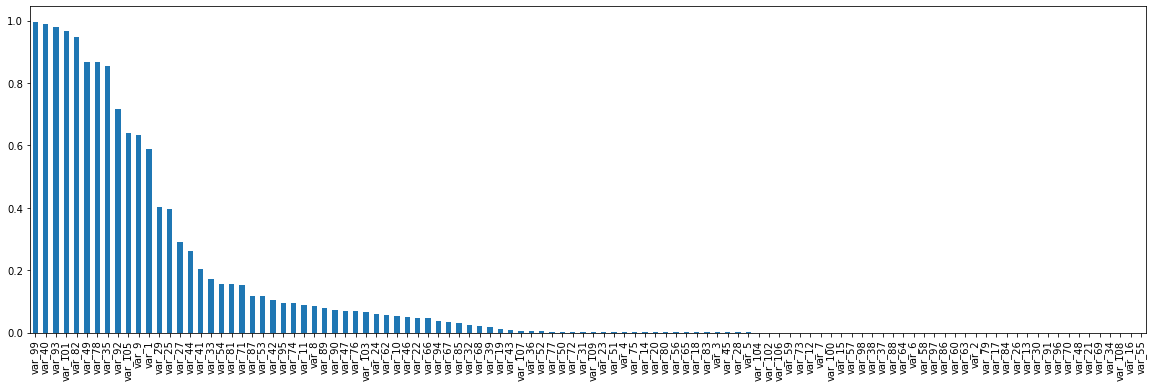

In [5]:
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 6))

In [6]:
sel_ = SelectKBest(f_classif, k=10).fit(X_train, y_train)

# display selected feature names
X_train.columns[sel_.get_support()]

Index(['var_16', 'var_21', 'var_34', 'var_48', 'var_55', 'var_69', 'var_70',
       'var_91', 'var_96', 'var_108'],
      dtype='object')

In [7]:
X_train = sel_.transform(X_train)

X_train.shape

(35000, 10)